# Rescorla-Wagner Model Example

The Rescorla-Wagner model suggests that learning occurs as a result of surprise.
If stimulus is followed by something unexpected it will gain associative strength
with regard to that unexpected event. The greater the surprise, the greater the
learning.

The extent to which the unexpected surprise (US) is expected in the future is the
result of the associative strengths of all stimuli present in trial. Including
context.

Therefore we can model this behaviour as:

\begin{equation*}
\Delta V = \alpha \beta (\lambda - \sum V)
\end{equation*}

Where:
* $V$ is the predictive value.
* $\alpha$ is the salience of the Conditioning Stimulus (CS).
* $\beta$ is the rate parameter of the Unsuspected Stimulus (US).
* $\lambda$ is the maximum associative strength supported by the US,
related to US magnitude.
* $(\lambda - \sum V)$ can be interpreted as the surprise.


This equation encapsulates interesting behavioural cases that we'll further
explore.


In [3]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


sb.set_context('notebook', font_scale=1.5)

In [4]:
# alpha = cs salience [0, 1]
# beta = us rate (learning rate) [0, 1]
# lam = assoc. str (related to reward value for example)
# vi = initial cue-surprise association  (0 for naive animals)
# n = number of points simulated
def rw(alpha=0.9, beta=0.1, lam=100, vi=0, n=100):
    v = np.zeros(n)
    v[0] = vi
    for i in range(n-1):
        delta = alpha*beta*(lam-v[i])
        v[i+1] = v[i]+delta
    return v

## Exploring Learning rate values

As an experimental example, salivary conditioning develops slower than taste aversion.
We will check how the learning rate $K = \alpha \times \beta$ changes in the associative
strength.

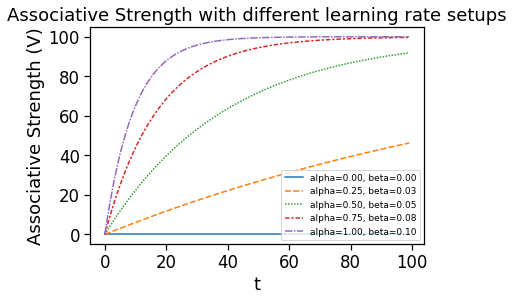

In [5]:
n_trials = 5
alphas = np.linspace(0, 1, n_trials)
betas = np.linspace(0, 0.1, n_trials)
v = []
for alpha, beta in zip(alphas, betas):
    v.append(rw(alpha=alpha, beta=beta))

# plot and add legend
legend = ['alpha={:.2f}, beta={:.2f}'.format(alpha, beta)
          for alpha, beta in zip(alphas, betas)]

sb.lineplot(data=v)
plt.legend(legend, prop={'size': 9}, loc=4)
plt.title('Associative Strength with different learning rate setups')
plt.xlabel('t')
plt.ylabel('Associative Strength (V)')
plt.show()

## Exploring Lambda Values
Lambda reflects the relation between CS and US. As an example US could be 25[V] shock
or 500[V] electric shock. And CS could be low-light versus bright-light.



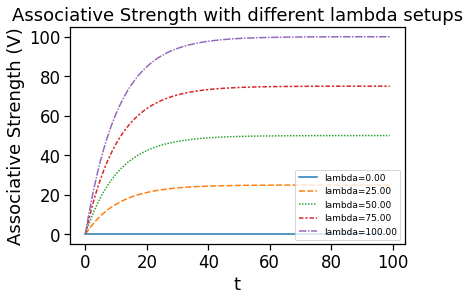

In [6]:
n_trials = 5
lambdas = np.linspace(0, 100, n_trials)
v = []
for lam in lambdas:
    v.append(rw(lam=lam))

# plot and add legend
legend = ['lambda={:.2f}'.format(lam) for lam in lambdas]

sb.lineplot(data=v)
plt.legend(legend, prop={'size': 9}, loc=4)
plt.title('Associative Strength with different lambda setups')
plt.xlabel('t')
plt.ylabel('Associative Strength (V)')
plt.show()